# Reducing data for use in anomaly detection

Based on work I previously did in the EDA section of my folder.

As always we first import packages we are going to use.

In [1]:
import sys
sys.path.insert(0,'G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Modules/')

import pandas as pd
import numpy as np
import seaborn as sns

Made a new folder in the main project folder called modules - here I have put in python scripts containing functions, the following block of code imports all functions from [/Modules/dt.py](https://github.com/Galeforse/Advanced-Cyber-Analytics-for-Attack-Detection/blob/main/Modules/dt.py) which are the datetime functions I have used throughout my other workbooks.

In [2]:
from dt import *

I then read in the process data, followed by the authentication data and check them both.

In [3]:
try:
    print("Looking for local copy of data...")
    dtn()
    df_p = pd.read_csv("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Data/Process data.gz",compression="gzip",index_col=0)
    stop = end()
    print("Data fetched locally in "+stop)
except OSError as e:
    if e.errno == 2:
        print("No Local data found. Importing from the web.")
        dtn()
        df_p = pd.read_csv("https://www.dropbox.com/s/c065rcq72abzm0s/Process_data.gz?dl=1",compression="gzip")
        stop = end()
        print("Data fetched from web in "+stop)
    else:
        print(e)

Looking for local copy of data...


G:\Programs\Anaconda\envs\det\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Data fetched locally in 0:01:12.587019


In [4]:
try:
    print("Looking for local copy of data...")
    dtn()
    df_a = pd.read_csv("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Data/Authentication data.gz",compression="gzip",index_col=0)
    stop = end()
    print("Data fetched locally in "+stop)
except OSError as e:
    if e.errno == 2:
        print("No Local data found. Importing from the web.")
        dtn()
        df_a = pd.read_csv("https://www.dropbox.com/s/c065rcq72abzm0s/Authentication_data.gz?dl=1",compression="gzip")
        stop = end()
        print("Data fetched from web in "+stop)
    else:
        print(e)

Looking for local copy of data...
Data fetched locally in 0:00:21.333754


In [5]:
df_p.head()

,UserName,Device,ProcessName,ParentProcessName,DailyCount
0,Comp748297$,Comp748297,Proc391839.exe,Proc387473,1
1,Comp563664$,Comp563664,rundll32.exe,services,1
2,User607396,Comp609111,Proc417435.exe,Proc417435,1
3,Comp641702$,Comp641702,Proc249569.exe,services,1
4,Comp157389$,Comp157389,Proc402696.exe,services,1


In [6]:
df_a.head()

,UserName,SrcDevice,DstDevice,Authent Type,Failure,DailyCount
0,User035855,Comp808475,Comp081330,TGS,0,17.0
1,Comp655251$,Comp655251,ActiveDirectory,NetworkLogon,0,350.0
2,User762066,Comp306129,ActiveDirectory,TGS,0,22.0
3,User384215,Comp095190,EnterpriseAppServer,NetworkLogon,0,35.0
4,User043263,Comp883307,Comp384394,TGS,0,2.0


## Counting

Here I recreate the counting script I have used in many other places, creating counts for the process data and the authentication data, labelled accordingly.

In [7]:
x = ["UserName","Device"]
counts_p = []
for i in x:
    z = df_p.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    counts_p.append(z)

In [8]:
x = ["UserName","SrcDevice","DstDevice"]
counts_a = []
for i in x:
    z = df_a.groupby(i).size().sort_values(ascending=False)
    z = pd.DataFrame(z)
    z.reset_index(level=0, inplace=True)
    z.columns = [i,'Count']
    counts_a.append(z)

In [9]:
counts_p[0]

,UserName,Count
0,Scanner,255383
1,User272607,73934
2,EnterpriseAppServer$,38552
3,Administrator,29443
4,User414014,18593
...,...,...
25315,User711040,1
25316,User296343,1
25317,User464715,1
25318,User126086,1


## Boxplots of Process Data - UserName

Each following subsection is labelled accordingly but all follow the same structure.

I plot the counts on a box plot to get an impression for the range of counts. I experiment by removing the those that seem to be extremely large, and most likely unsuitable for analysis. I remove a certain number from the top end of the data, picking the number by observation. For example, in the first plot we can clearly see that, less so as we go further down, the highest 4 counts are considerably larger than the rest of the data, and so we remove these to see if we get a less anomalous spread.

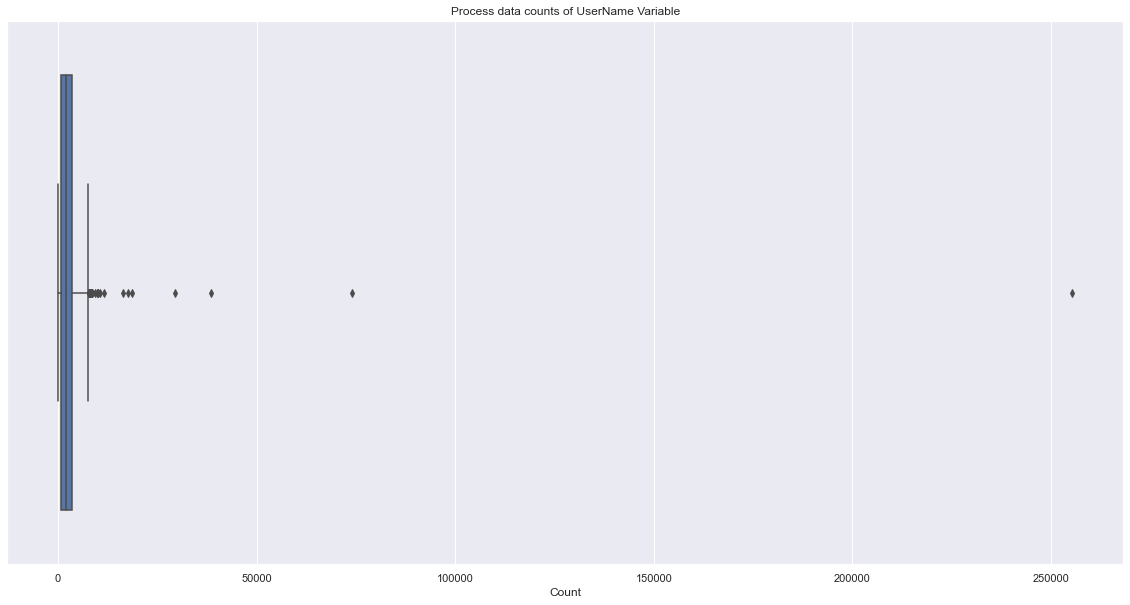

In [14]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_p[0]["Count"]).set_title("Process data counts of UserName Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Process/P_UN.png")

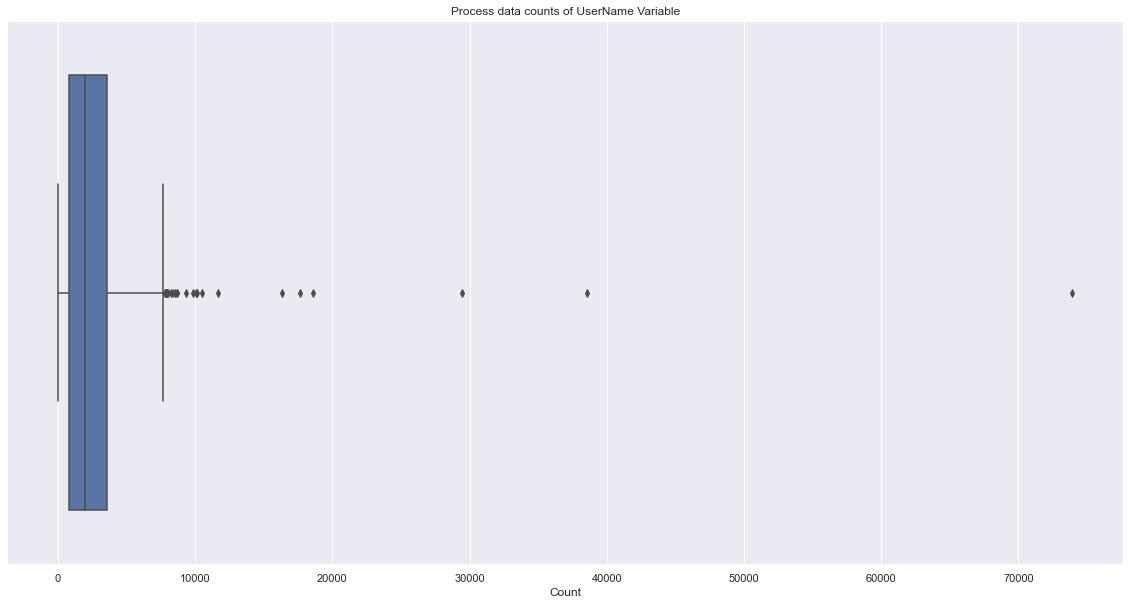

In [15]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_p[0]["Count"][1:]).set_title("Process data counts of UserName Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Process/P_UN_minus_1.png")

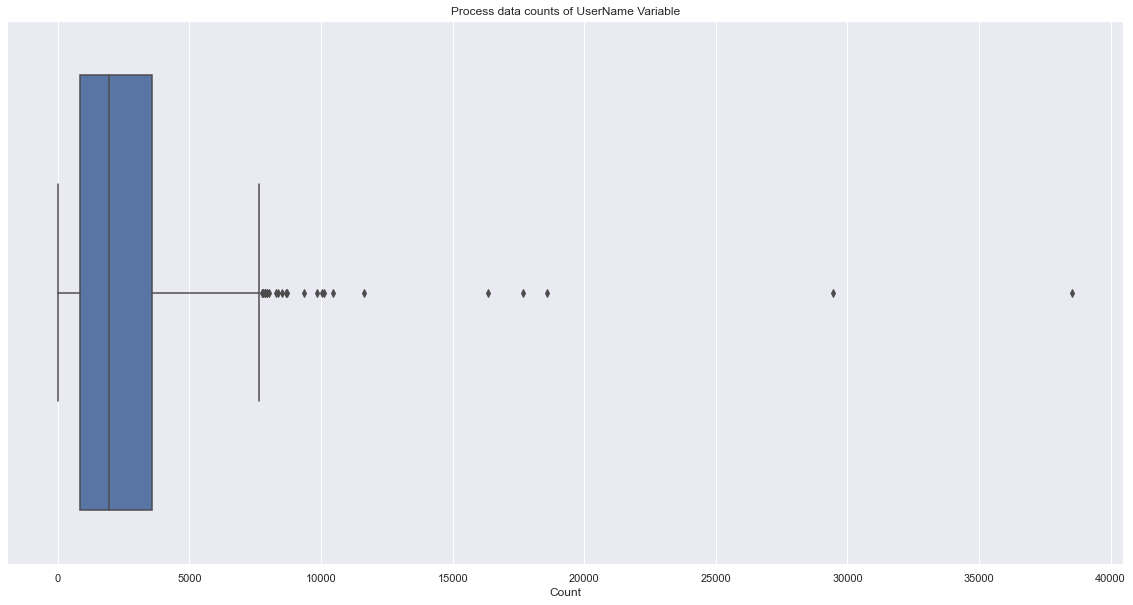

In [16]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_p[0]["Count"][2:]).set_title("Process data counts of UserName Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Process/P_UN_minus_2.png")

## Boxplots of Process Data - Device

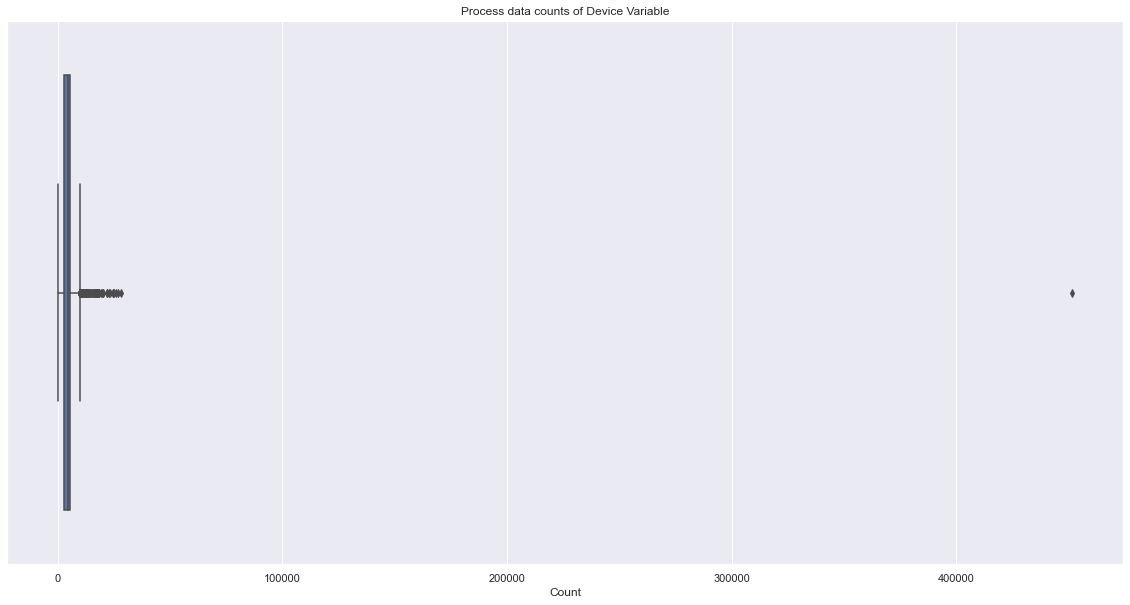

In [17]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_p[1]["Count"]).set_title("Process data counts of Device Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Process/P_D.png")

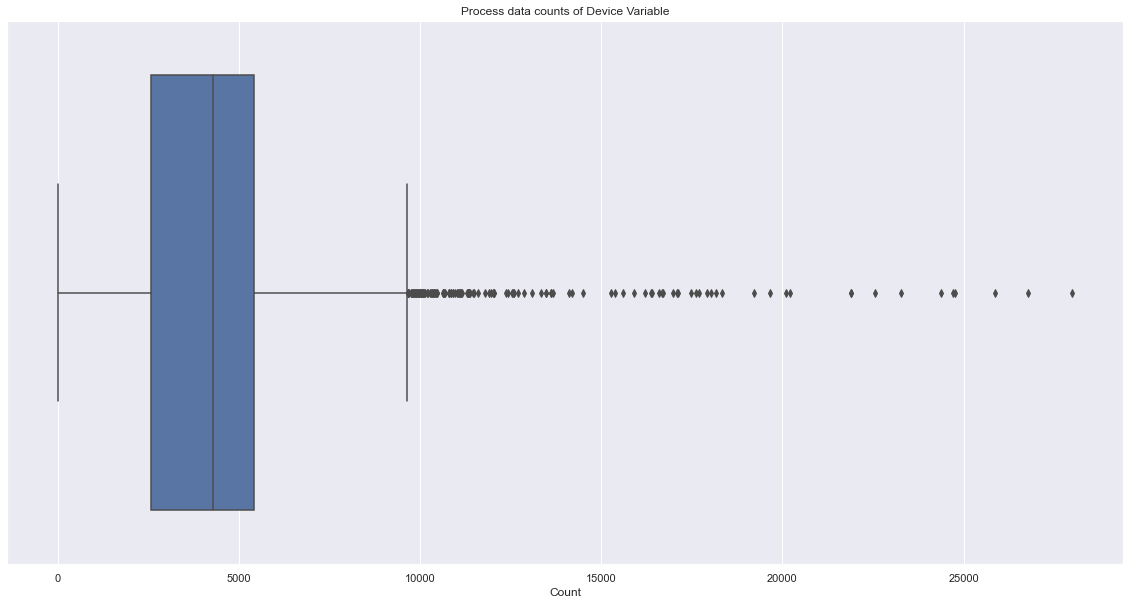

In [18]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_p[1]["Count"][1:]).set_title("Process data counts of Device Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Process/P_D_minus_1.png")

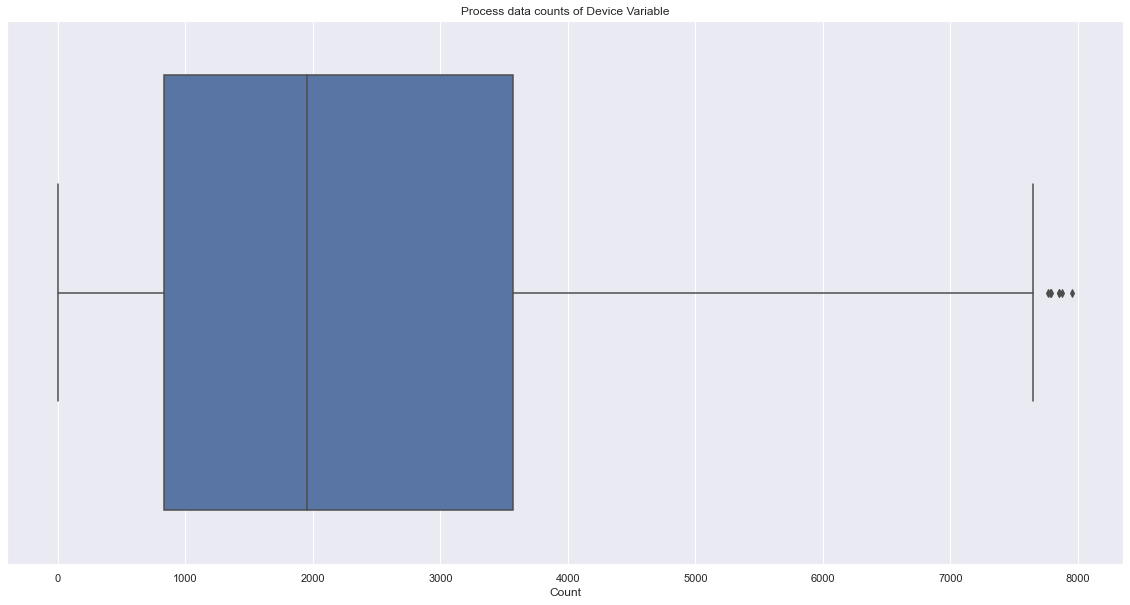

In [19]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_p[0]["Count"][20:]).set_title("Process data counts of Device Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Process/P_D_minus_20.png")

## Boxplots of Auth Data - UserName

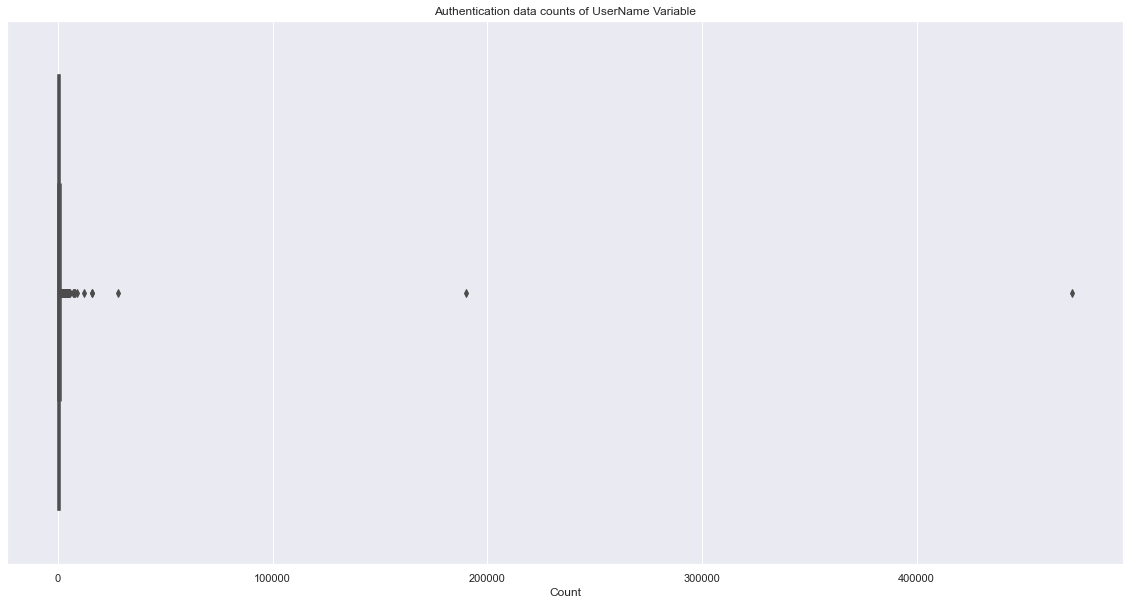

In [20]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[0]["Count"]).set_title("Authentication data counts of UserName Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_UN.png")

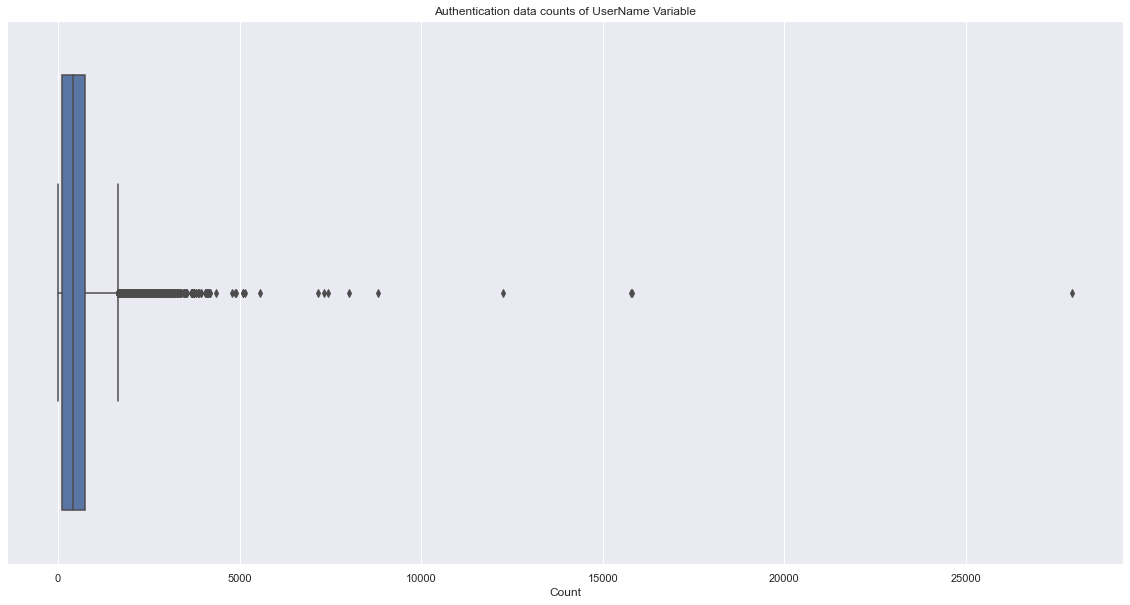

In [21]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[0]["Count"][2:]).set_title("Authentication data counts of UserName Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_UN_minus_2.png")

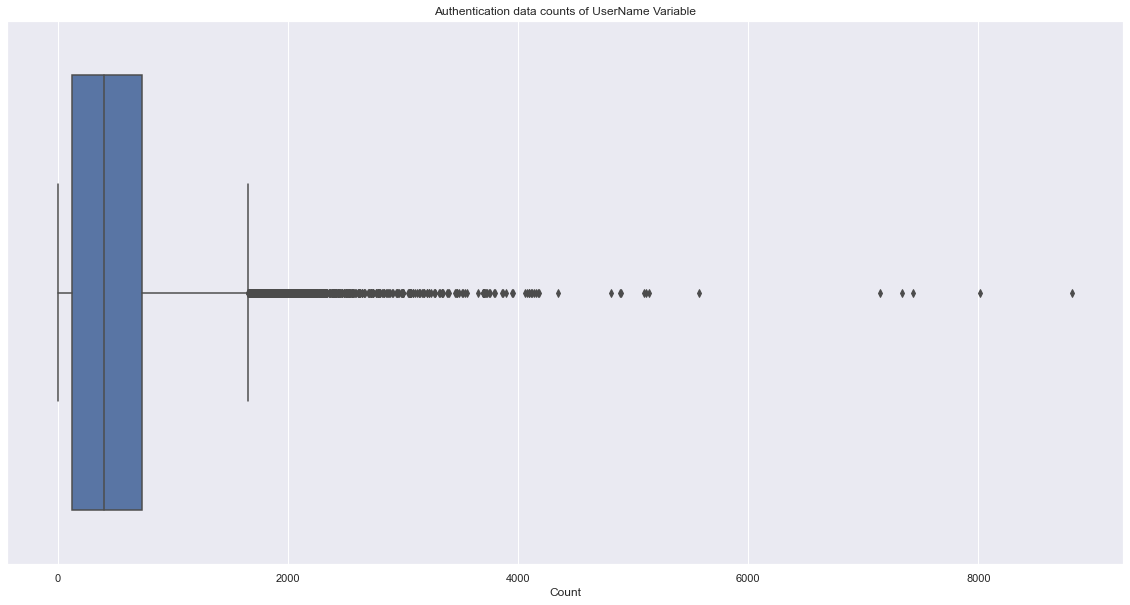

In [22]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[0]["Count"][6:]).set_title("Authentication data counts of UserName Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_UN_minus_6.png")

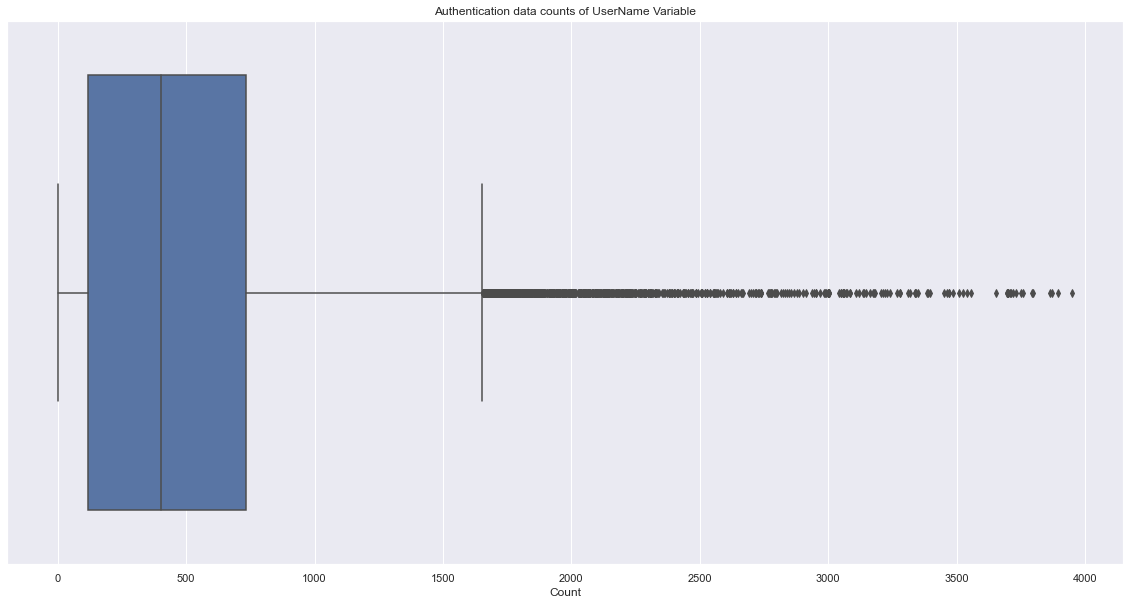

In [23]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[0]["Count"][30:]).set_title("Authentication data counts of UserName Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_UN_minus_30.png")

## Boxplots of Auth Data - SrcDevice

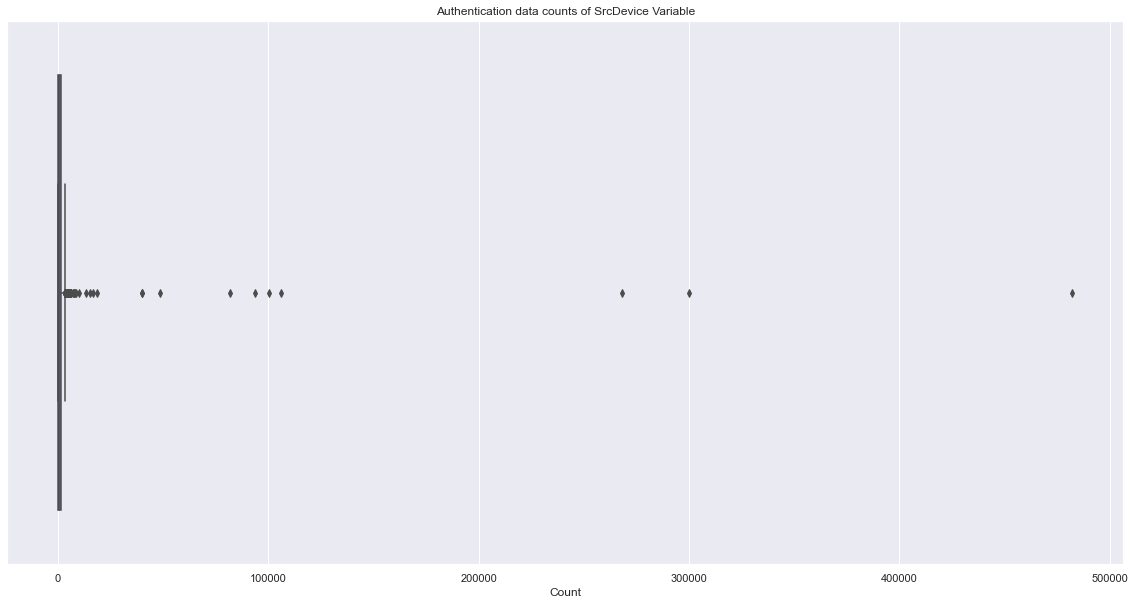

In [24]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[1]["Count"]).set_title("Authentication data counts of SrcDevice Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_SD.png")

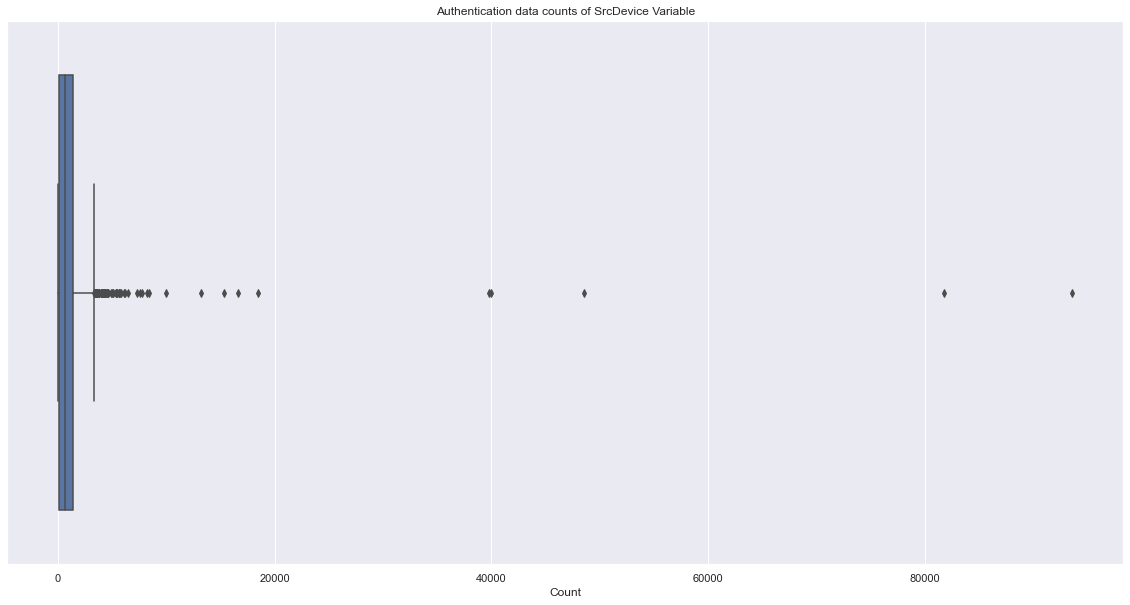

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[1]["Count"][5:]).set_title("Authentication data counts of SrcDevice Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_SD_minus_5.png")

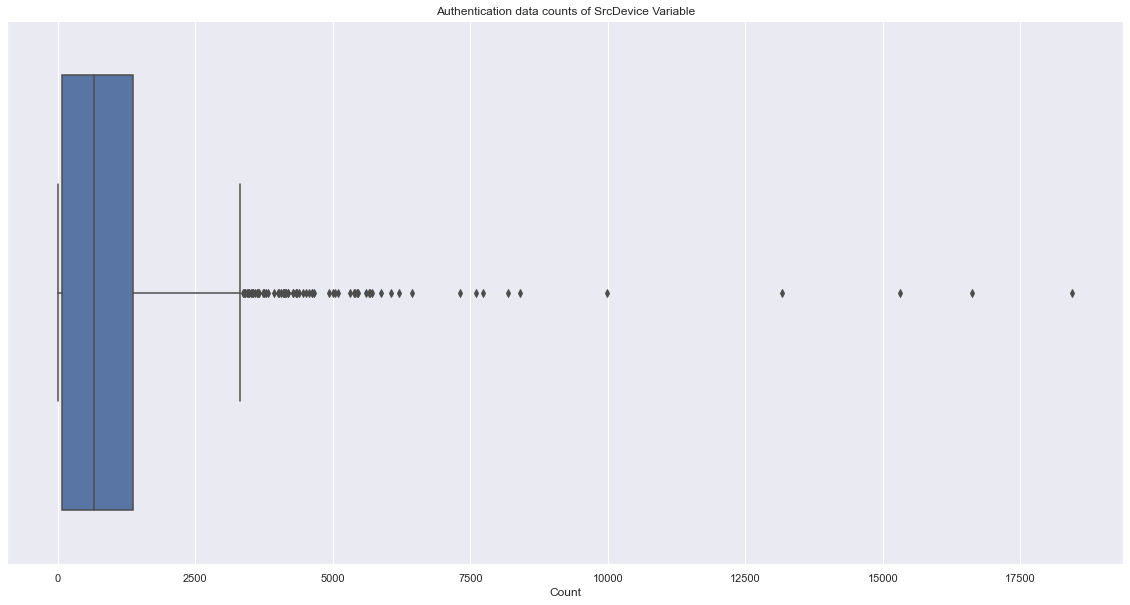

In [26]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[1]["Count"][10:]).set_title("Authentication data counts of SrcDevice Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_SD_minus_10.png")

## Boxplots of Auth Data - DstDevice

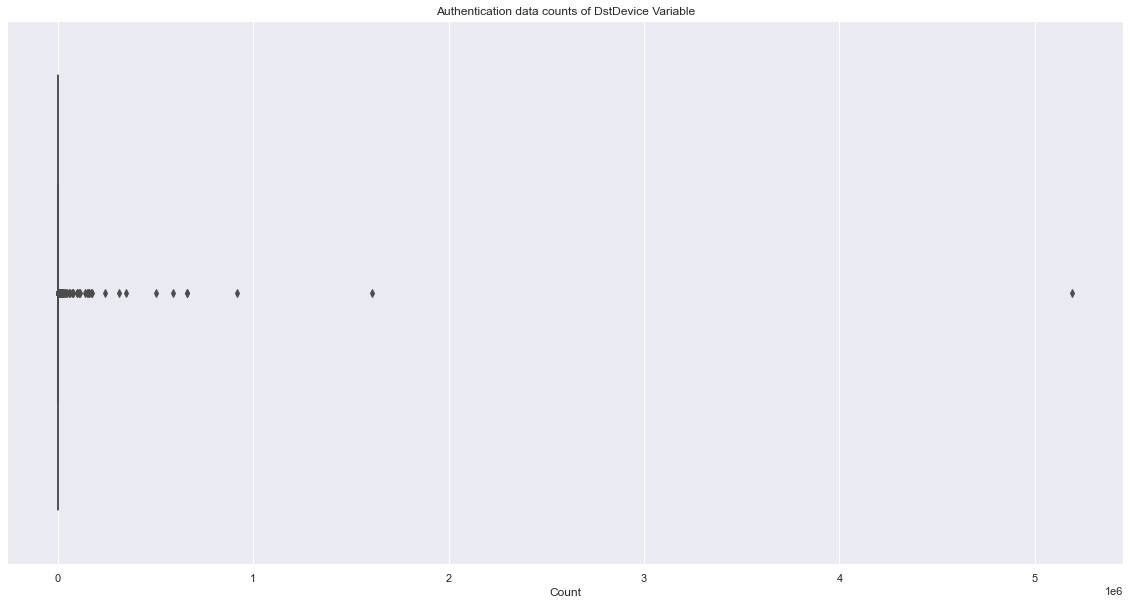

In [27]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[2]["Count"]).set_title("Authentication data counts of DstDevice Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_SD_minus_10.png")

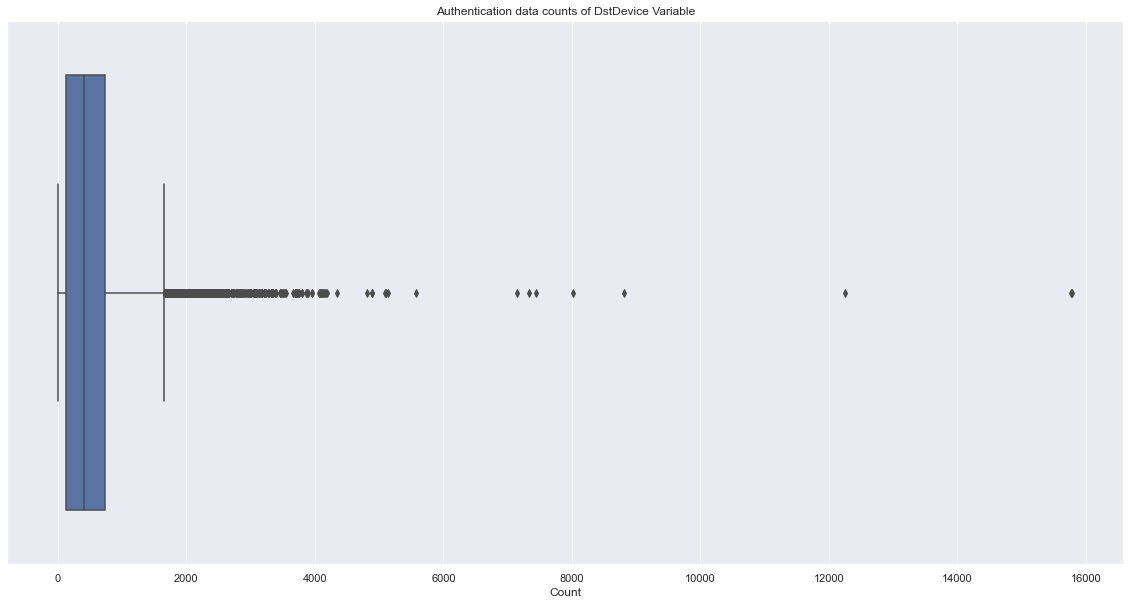

In [28]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[0]["Count"][3:]).set_title("Authentication data counts of DstDevice Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_DD_minus_3.png")

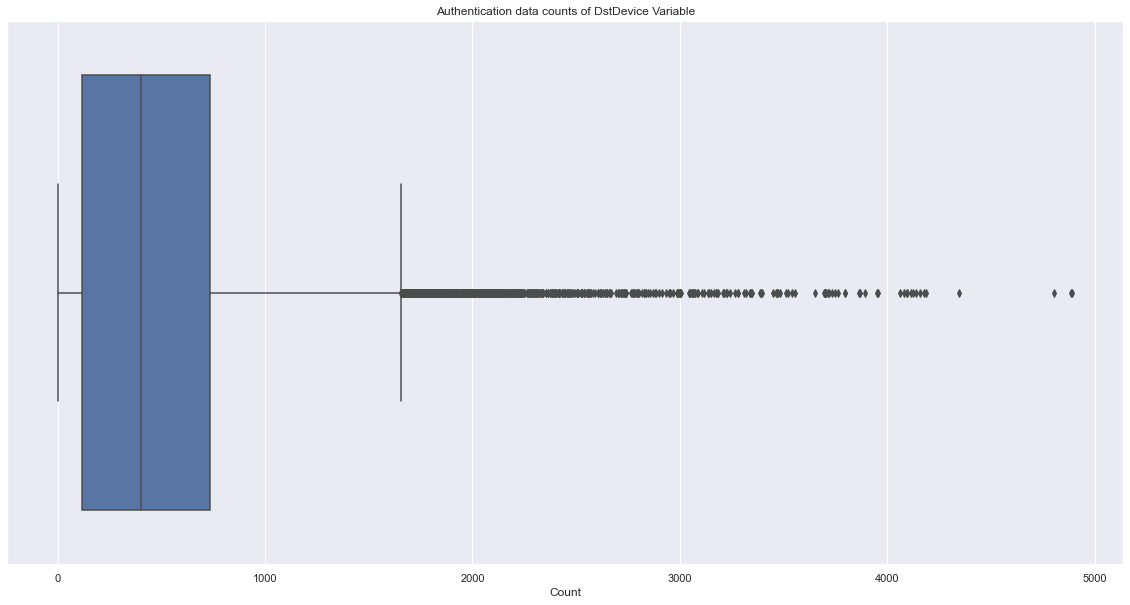

In [29]:
sns.set(rc={'figure.figsize':(20,10)})
plot = sns.boxplot(x=counts_a[0]["Count"][15:]).set_title("Authentication data counts of DstDevice Variable")
fig = plot.get_figure()
fig.savefig("G:/Users/Gabriel/Documents/Education/UoB/GitHubDesktop/Advanced-Cyber-Analytics-for-Attack-Detection/Gabriel/Plots/Boxplot/Auth/A_DD_minus_15.png")